# Load module

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, utils

from models.ssd300 import SSD300
from models.core.loss import SSDLoss
from models.train import *
from models.core.scheduler import *

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader
from torch.optim.sgd import SGD
from torch.optim.adam import Adam

# Load Dataset

In [2]:
transform = transforms.Compose(
        [transforms.Ignore(difficult=True),
         transforms.Normalize(),
         transforms.Centered(),
         transforms.Resize((300, 300)), # if resizing first, can't be normalized
         transforms.SubtractMean((123.68, 116.779, 103.939)),
         transforms.OneHot(class_nums=datasets.VOC_class_nums),
         transforms.ToTensor()]
    )
train_dataset = datasets.VOC2007Dataset(transform=transform)

train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=utils.batch_ind_fn)
print('{} training images'.format(len(train_dataset)))

9963 training images


# Define model

In [3]:
model = SSD300(class_nums=train_dataset.class_nums, batch_norm=False)
model.load_vgg_weights()
print(model)

SSD300(
  (feature_layers): ModuleDict(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1_1): ReLU()
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1_2): ReLU()
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2_1): ReLU()
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2_2): ReLU()
    (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_1): ReLU()
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_2): ReLU()
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_3): ReLU()
    (pool3): MaxPool2d(kernel_size=

# Set matplotlib for Jupyter notebook

In [4]:
%matplotlib notebook

# Run training

<IPython.core.display.Javascript object>


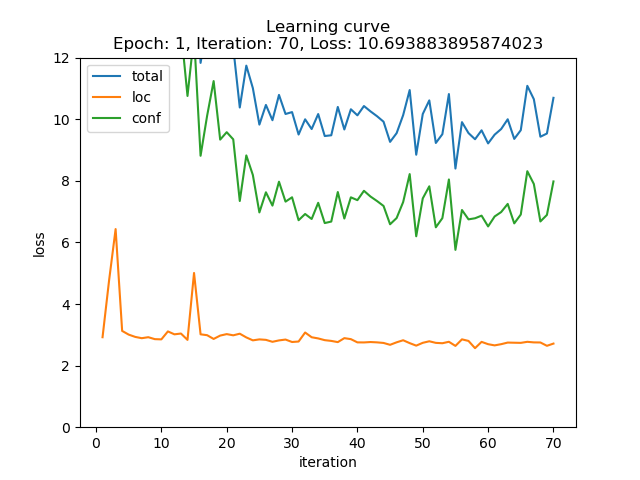

Training... Epoch: 1, Iter: 10,	 [320/9963	 (3%)]	Loss: 16.698863, Loc Loss: 2.851569, Conf Loss: 13.847294
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0000010_checkpoints20200429.pth

Training... Epoch: 1, Iter: 20,	 [640/9963	 (6%)]	Loss: 12.600293, Loc Loss: 3.022251, Conf Loss: 9.5780421
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0000020_checkpoints20200429.pth

Training... Epoch: 1, Iter: 30,	 [960/9963	 (10%)]	Loss: 10.230757, Loc Loss: 2.766341, Conf Loss: 7.464416
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0000030_checkpoints20200429.pth

Training... Epoch: 1, Iter: 40,	 [1280/9963	 (13%)]	Loss: 10.125532, Loc Loss: 2.754067, Conf Loss: 7.371465
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0000040_checkpoints20200429.pth

Tra

<IPython.core.display.Javascript object>


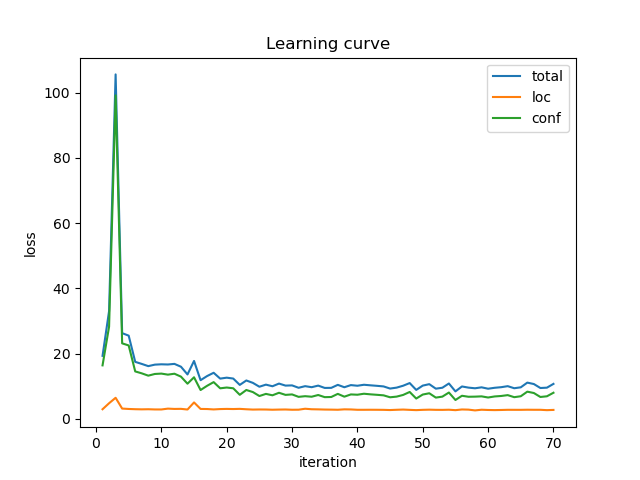

Saved graph to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/ssd300-voc2007_learning-curve_i-70.png


In [5]:
#optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4) # late
optimizer = Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)
iter_sheduler = SSDIterMultiStepLR(optimizer, milestones=(40000, 50000), gamma=0.1, verbose=True)

save_manager = SaveManager(modelname='ssd300-voc2007', interval=10, max_checkpoints=15)#5000
log_manager = LogManager(interval=10, save_manager=save_manager, live_graph=LiveGraph((0, 12)))
trainer = TrainLogger(model, loss_func=SSDLoss(), optimizer=optimizer, scheduler=iter_sheduler, log_manager=log_manager, gpu=True)

trainer.train(70, train_loader)
#trainer.train(60000, train_loader)